<a href="https://colab.research.google.com/github/SofiaNguyenn/K-means-Clustering-for-Flood-Event-Classification/blob/main/SeasonalFlood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
#loading the data from CSV file to a Pandas Dataframe
data = pd.read_csv('Floods in Malaysia022.csv')

In [ ]:
# Display first 5 rows in the dataframe
print(data.head(5))

   State  District  Year  Spring Rainfall  Summer Rainfall  Autumn Rainfall  \
0    108    108001  2000            59.10            62.75            61.51   
1    108    108001  2001            41.70            55.98            62.99   
2    108    108001  2002            22.19            46.47            56.98   
3    108    108001  2003            43.81            40.92            75.26   
4    108    108001  2004            34.58            45.00            60.10   

   Winter Rainfall  Annual Rainfall  Flood  Unnamed: 9  ...  Unnamed: 13  \
0           101.77          2566.19      0         NaN  ...          NaN   
1            75.72          2127.50      1         NaN  ...          NaN   
2            81.43          1863.70      1         NaN  ...          NaN   
3           123.99          2555.77      1         NaN  ...          NaN   
4            79.58          1973.39      1         NaN  ...          NaN   

   Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  

In [ ]:
#Check for missing values
print(data.isnull().sum())

State                0
District             0
Year                 0
Spring Rainfall      0
Summer Rainfall      0
Autumn Rainfall      0
Winter Rainfall      0
Annual Rainfall      0
Flood                0
Unnamed: 9         825
Unnamed: 10        825
Unnamed: 11        825
Unnamed: 12        825
Unnamed: 13        825
Unnamed: 14        825
Unnamed: 15        825
Unnamed: 16        825
Unnamed: 17        825
Unnamed: 18        825
Unnamed: 19        825
Unnamed: 20        825
Unnamed: 21        825
Unnamed: 22        824
dtype: int64


In [ ]:
#remove all columns with names starting with 'Unnamed'
data_cleaned = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [ ]:
# Descriptive statistics calculation for numerical data
descriptive_stats = data_cleaned.describe()

# Display results
print(descriptive_stats)


            State      District         Year  Spring Rainfall  \
count  825.000000     825.00000   825.000000       825.000000   
mean   108.493333  108537.84000  2005.000000        63.430642   
std      4.189419    4171.67445     3.164196        35.969222   
min    101.000000  101001.00000  2000.000000         5.740000   
25%    105.000000  105001.00000  2002.000000        35.900000   
50%    109.000000  109005.00000  2005.000000        58.600000   
75%    112.000000  112011.00000  2008.000000        79.930000   
max    113.000000  113013.00000  2010.000000       198.920000   

       Summer Rainfall  Autumn Rainfall  Winter Rainfall  Annual Rainfall  \
count       825.000000       825.000000       825.000000       825.000000   
mean         62.897636        70.109818       104.336776      2706.973358   
std          16.687989        17.104235        28.396172       558.700699   
min          30.280000        37.560000        46.970000      1686.500000   
25%          50.850000       

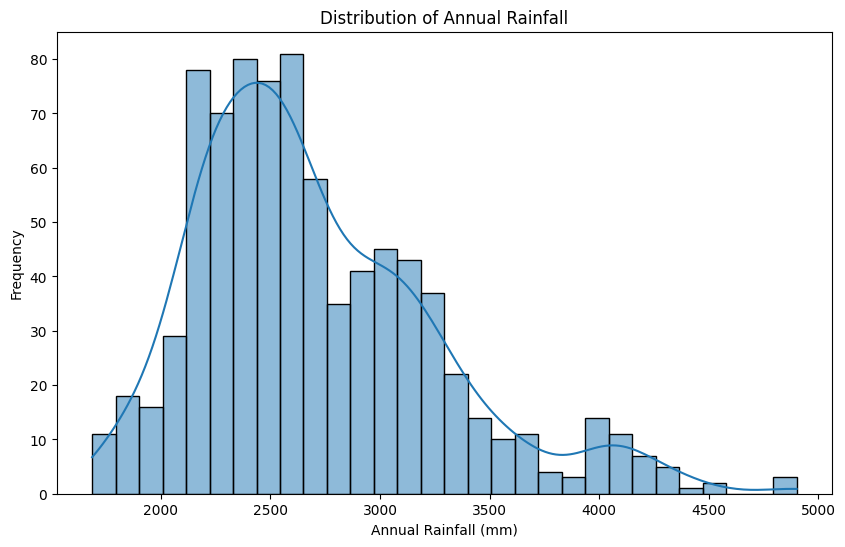

In [ ]:
# Visualizations
# Histogram of Annual Rainfall
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Rainfall'], bins=30, kde=True)
plt.title('Distribution of Annual Rainfall')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

Box Plot

In [ ]:
melted_data = data.melt(value_vars=['Spring Rainfall', 'Summer Rainfall',
                                    'Autumn Rainfall', 'Winter Rainfall'],
                         var_name='Season', value_name='Rainfall')

<ipython-input-30-fae2450726ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Rainfall', data=melted_data, palette=['red', 'green', 'blue', 'orange'])


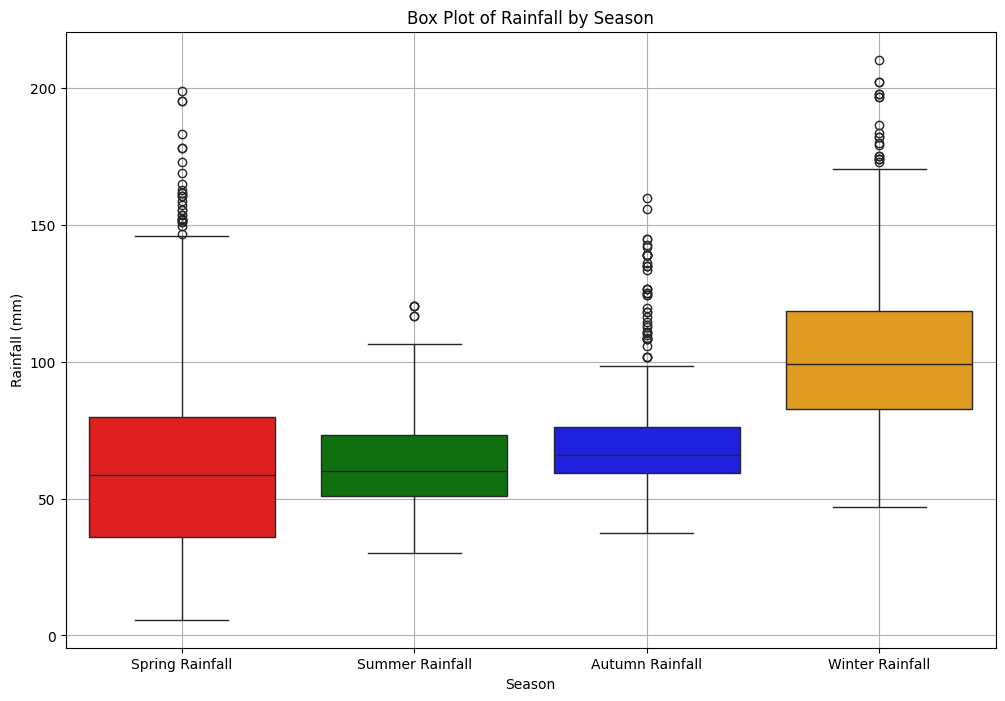

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Rainfall', data=melted_data, palette=['red', 'green',
                                                                 'blue','orange'])
plt.title('Box Plot of Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

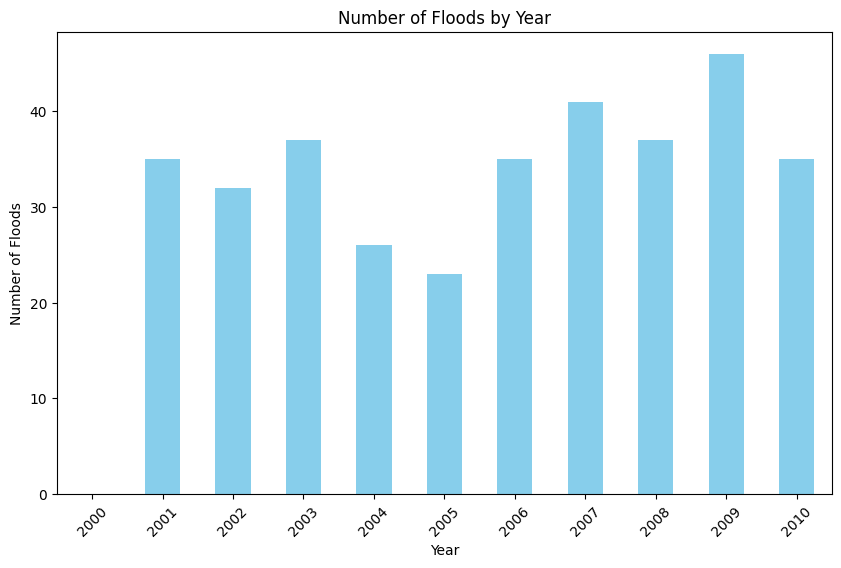

In [ ]:
# Bar chart for flood occurrences by year
flood_counts = data.groupby('Year')['Flood'].sum()
plt.figure(figsize=(10, 6))
flood_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Floods by Year')
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.xticks(rotation=45)
plt.show()

Heatmap

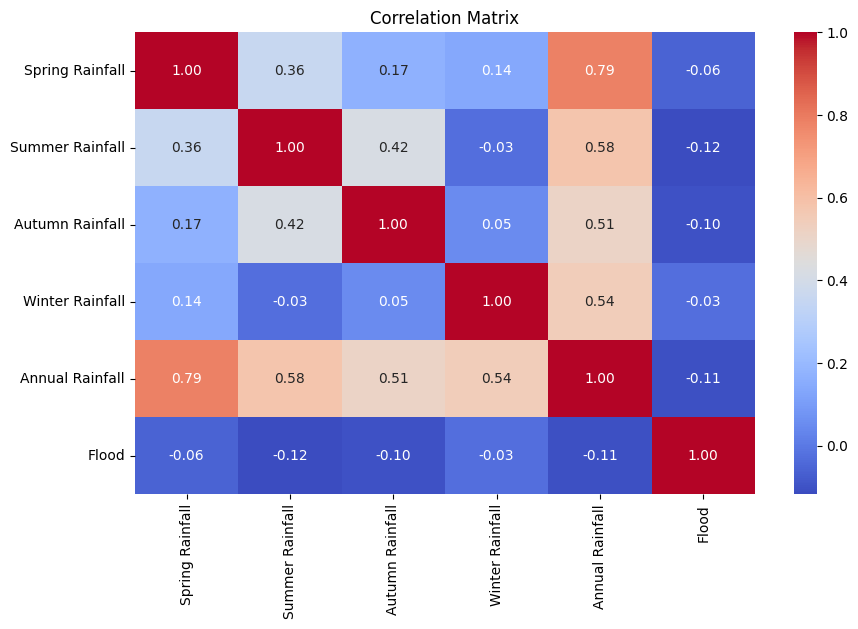

In [ ]:
#  Correlation analysis
correlation_matrix = data[['Spring Rainfall', 'Summer Rainfall', 'Autumn Rainfall', 'Winter Rainfall', 'Annual Rainfall', 'Flood']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Choosing the number of clusters

inertia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Floods in Malaysia022.csv')

In [ ]:
# Select relevant features for clustering
features = ['Spring Rainfall', 'Summer Rainfall', 'Autumn Rainfall', 'Winter Rainfall', 'Annual Rainfall']
X = data[features]

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Calculate K-Means for different values of K
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

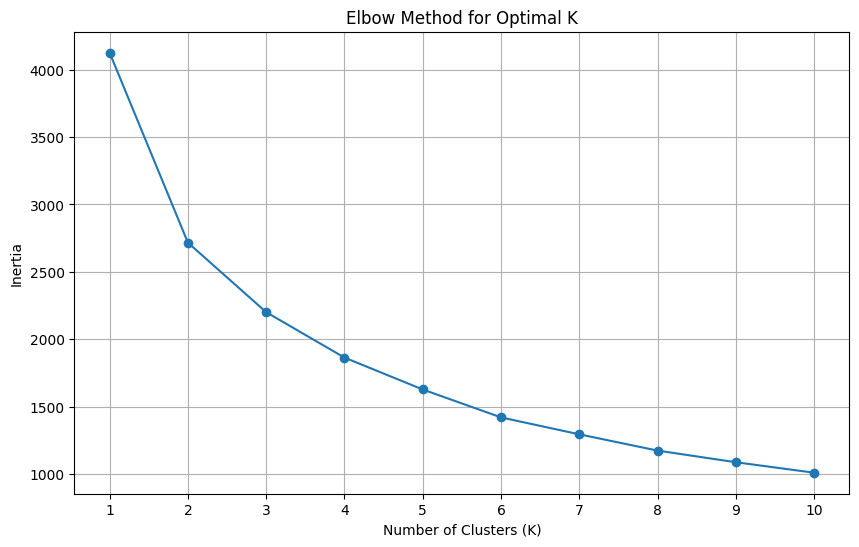

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

Optimum Number of Cluster = 4

Training the K-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 2 2 0 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0
 2 2 2 2 0 0 2 0 2 2 0 2 2 0 2 0 0 2 3 2 2 0 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 0 0 2 0 2 2 0 2 2 2 2 0 0 2 0
 2 2 0 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 0 0 2 0 2 2 0 2
 2 2 2 0 0 2 0 2 2 0 2 2 2 2 0 0 2 0 2 2 0 0 2 0 0 3 0 0 0 0 0 0 0 2 3 0 3
 0 0 0 0 0 0 0 2 3 0 3 0 0 0 0 0 0 0 2 3 0 3 0 0 0 0 0 0 0 2 3 0 3 0 0 0 0
 0 0 2 2 3 0 0 0 0 0 0 0 0 0 2 3 0 3 0 0 0 0 0 0 2 2 3 0 0 0 0 0 0 2 2 2 2
 0 0 0 2 0 0 0 2 2 2 2 0 0 0 2 0 0 0 2 2 2 2 0 0 0 2 0 0 0 2 2 2 2 0 0 0 2
 0 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 2 2 2 2 0 0 0 2 2 2 0 2
 2 2 2 0 0 0 2 2 0 3 2 0 0 0 3 3 0 2 0 0 3 2 2 0 2 0 0 0 0 2 0 0 2 0 0 2 0
 0 0 0 2 0 3 2 0 0 0 0 3 3 3 2 0 3 0 3 3 0 0 3 3 3 2 0 3 0 3 3 0 0 3 3 3 2
 3 3 0 3 3 0 0 0 3 3 0 3 0 2 3 0 0 0 0 3 3 0 3 0 2 3 0 0 0 0 3 3 0 3 0 2 0
 0 0 0 0 3 3 0 3 0 2 0 0 0 0 0 3 3 0 3 0 2 0 2 0 0 2 3 3 0 3 2 2 0 2 0 2 2
 3 0 0 3 2 2 2 2 2 2 2 3 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 Cluster _ 0, 1, 2, 3

Visualizing all the Clusters

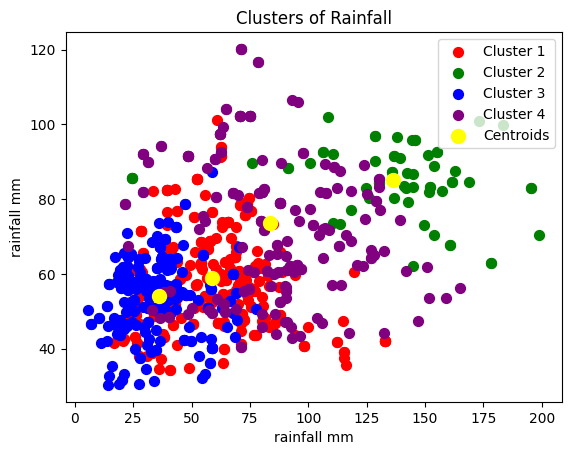

In [ ]:
# plotting all the clusters and their Centroids
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=50, c="red", label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=50, c="green", label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=50, c="blue", label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=50, c="purple", label='Cluster 4')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=100, c="yellow", label='Centroids')

# plot the centroids
plt.title('Clusters of Rainfall')
plt.xlabel('rainfall mm')
plt.ylabel('rainfall mm')
plt.legend()
plt.show()